<a href="https://www.kaggle.com/code/biancadobie/sc1015-mini-project-fe12df-6b8808?scriptVersionId=129833172" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# SC1015 Mini Project
<ol>
  <li>Dang Huy Phuong (U2120380G)</li>
  <li>Clara Heng (U2122795J)</li>
</ol>

# Content
<ol>
  <li>Problem and Objective</li>
  <li>Data Preparation and Cleaning</li>
  <li> Exploratory Data Analysis </li>
  <li>Supervised Method</li>
  <li>Unsupervised Method</li>
  <li>Finding and Conclusion </li>
</ol>

# 1. Problem and Objective
Based on the Formula 1 World Championship (1950 - 2023) dataset from Kaggle https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020 we aim to build model to predict:
<ul>
  <li>Which driver will finish in the top position in the Driver’s Championship at the end of the season based on their past performance and characteristics using supervised learning methods</li>
  <li>If a driver have potential to become a top F1 driver based on their previous performance, team composition, and financial status
</li>
</ul>

# 2. Data Preparation and Cleaning

In this section, we aim to check for missing/uncompleted values, remove columns that are insignificant in predicting and engineer new feature

In [1]:
import pandas as pd
import numpy as np

#visualization tools
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
from datetime import datetime
sns.set()

from os import listdir
from os.path import isfile, join

## 2.1 Construting Master Dataframe

In this subsection, we build a master dataframe from various csv file (i.e. drivers.csv, results.csv, circuits.csv)

In [2]:
mypath = '/kaggle/input/formula-1-world-championship-1950-2020'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
for file in onlyfiles:
    print(file) #names of the all datasets

races.csv
constructor_results.csv
drivers.csv
constructors.csv
lap_times.csv
status.csv
driver_standings.csv
seasons.csv
pit_stops.csv
sprint_results.csv
constructor_standings.csv
results.csv
circuits.csv
qualifying.csv


### 2.1.1 Read Files

In [3]:
drivers = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/drivers.csv')
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou
854,856,de_vries,45,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri


In [4]:
driver_result = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/results.csv')
driver_result.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [5]:
races = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/races.csv')
races_date = races[['date', 'circuitId', 'raceId']]
races_date['date'] = pd.to_datetime(races_date['date'])

#Elimating Uncompleted data - Year 2023 and 2022
races_date = races_date[(races_date['date'].dt.year!=2023) & (races_date['date'].dt.year!=2022)]
races_date.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,circuitId,raceId
0,2009-03-29,1,1
1,2009-04-05,2,2
2,2009-04-19,17,3
3,2009-04-26,3,4
4,2009-05-10,4,5


In [6]:
circuits = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/circuits.csv')
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [7]:
driver_standings = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/driver_standings.csv')
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [8]:
laptimes = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/lap_times.csv')
laptimes = laptimes[['raceId','driverId','lap','milliseconds']]
laptimes.head()

,raceId,driverId,lap,milliseconds
0,841,20,1,98109
1,841,20,2,93006
2,841,20,3,92713
3,841,20,4,92803
4,841,20,5,92342


In [9]:
qualifying = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/qualifying.csv')
qualifying = qualifying[['driverId','position']]
qualifying.head()

,driverId,position
0,1,1
1,9,2
2,5,3
3,13,4
4,2,5


### 2.1.2 Merge Dataframes

In [10]:
df1 = pd.merge(driver_result, races, on ='raceId')
df_race= pd.merge(df1, drivers, on = 'driverId')
df_race
#:)

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,sprint_date,sprint_time,driverRef,number_y,code,forename,surname,dob,nationality,url_y
0,1,18,1,1,22,1,1,1,1,10.0,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,27,19,1,1,22,9,5,5,5,4.0,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
2,57,20,1,1,22,3,13,13,13,0.0,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
3,69,21,1,1,22,5,3,3,3,6.0,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
4,90,22,1,1,22,3,2,2,2,8.0,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25777,1093,855,51,24,18,12,12,12,0.0,...,\N,\N,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou
25836,25798,1094,855,51,24,12,13,13,13,0.0,...,\N,\N,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou
25837,25817,1095,855,51,24,13,12,12,12,0.0,...,2022-11-12,19:30:00,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou
25838,25837,1096,855,51,24,15,12,12,12,0.0,...,\N,\N,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou


In [11]:
#Drop posterior data column (time, milliseconds, fastestLap, fastestLapTime, fastestLapSpeed, statusId)
posterior_data = ['laps', 'milliseconds', 'fastestLap', 'fastestLapTime', 'fastestLapSpeed', 'statusId', 'time_x', 'time_y', 'positionOrder']
df_race = df_race.drop(columns=posterior_data)
df_race

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,points,rank,...,sprint_date,sprint_time,driverRef,number_y,code,forename,surname,dob,nationality,url_y
0,1,18,1,1,22,1,1,1,10.0,2,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,27,19,1,1,22,9,5,5,4.0,3,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
2,57,20,1,1,22,3,13,13,0.0,19,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
3,69,21,1,1,22,5,3,3,6.0,3,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
4,90,22,1,1,22,3,2,2,8.0,2,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25777,1093,855,51,24,18,12,12,0.0,15,...,\N,\N,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou
25836,25798,1094,855,51,24,12,13,13,0.0,7,...,\N,\N,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou
25837,25817,1095,855,51,24,13,12,12,0.0,17,...,2022-11-12,19:30:00,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou
25838,25837,1096,855,51,24,15,12,12,0.0,8,...,\N,\N,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou


In [12]:
#Drop redundant positon and positionText column
df_race = df_race.drop(columns=['position',  'positionText', 'number_x', 'sprint_date', 'sprint_time', 'driverRef', 'number_y', 'nationality', 'url_x', 'url_y', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'quali_date', 'quali_time', 'fp3_date', 'fp3_time', 'name'])
df_race

,resultId,raceId,driverId,constructorId,grid,points,rank,year,round,circuitId,date,code,forename,surname,dob
0,1,18,1,1,1,10.0,2,2008,1,1,2008-03-16,HAM,Lewis,Hamilton,1985-01-07
1,27,19,1,1,9,4.0,3,2008,2,2,2008-03-23,HAM,Lewis,Hamilton,1985-01-07
2,57,20,1,1,3,0.0,19,2008,3,3,2008-04-06,HAM,Lewis,Hamilton,1985-01-07
3,69,21,1,1,5,6.0,3,2008,4,4,2008-04-27,HAM,Lewis,Hamilton,1985-01-07
4,90,22,1,1,3,8.0,2,2008,5,5,2008-05-11,HAM,Lewis,Hamilton,1985-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25777,1093,855,51,18,0.0,15,2022,19,69,2022-10-23,ZHO,Guanyu,Zhou,1999-05-30
25836,25798,1094,855,51,12,0.0,7,2022,20,32,2022-10-30,ZHO,Guanyu,Zhou,1999-05-30
25837,25817,1095,855,51,13,0.0,17,2022,21,18,2022-11-13,ZHO,Guanyu,Zhou,1999-05-30
25838,25837,1096,855,51,15,0.0,8,2022,22,24,2022-11-20,ZHO,Guanyu,Zhou,1999-05-30


### 2.1.3 Feature Engineer

#### Age

In [13]:
#Change data type from string to datetime
df_race['dob'] = pd.to_datetime(df_race['dob'])
df_race['date'] = pd.to_datetime(df_race['date'])

In [14]:
#Add age column to dataframe
dates = datetime.today()-df_race['dob']
age = dates.dt.days/365
df_race['age'] = round(age)
df_race.head()

,resultId,raceId,driverId,constructorId,grid,points,rank,year,round,circuitId,date,code,forename,surname,dob,age
0,1,18,1,1,1,10.0,2,2008,1,1,2008-03-16,HAM,Lewis,Hamilton,1985-01-07,38.0
1,27,19,1,1,9,4.0,3,2008,2,2,2008-03-23,HAM,Lewis,Hamilton,1985-01-07,38.0
2,57,20,1,1,3,0.0,19,2008,3,3,2008-04-06,HAM,Lewis,Hamilton,1985-01-07,38.0
3,69,21,1,1,5,6.0,3,2008,4,4,2008-04-27,HAM,Lewis,Hamilton,1985-01-07,38.0
4,90,22,1,1,3,8.0,2,2008,5,5,2008-05-11,HAM,Lewis,Hamilton,1985-01-07,38.0


#### winRate - Likelihood of winning a race

In [15]:
# INITIALISATION
df_driver = drivers.copy()
df_driver['totalWins'] = 0

race_dates = races[['raceId','date']]
# CLEANING AND ADDING

# adding dates to each race
driver_standings = driver_standings.merge(race_dates[['raceId', 'date']], how='left', on='raceId')

# Convert the "date" column to a datetime object
driver_standings['date'] = pd.to_datetime(driver_standings['date'])

# Create a new column 'year' to extract the year from the 'date' column
driver_standings['year'] = driver_standings['date'].dt.year
# driver_standings_csv.head()

# count the number of races each driver has driven in
num_races_per_driver = driver_standings.groupby('driverId')['raceId'].nunique()
num_races_per_driver_df = num_races_per_driver.reset_index()
num_races_per_driver_df = num_races_per_driver_df.rename(columns={'raceId': 'totalRaces'})
# num_races_per_driver_df.head()

# FINDING TOTAL WINS FOR EACH DRIVER
for index, row in df_driver.iterrows():
    driverId = row['driverId']

    # filtering out rows with ['driverId'] == driverId
    driver_standings_csv_driverId = driver_standings[driver_standings['driverId'] == driverId]

    # Group the dataframe by year and find the maximum date for each year
    latest_day_in_year = driver_standings_csv_driverId.groupby(driver_standings_csv_driverId['date'].dt.year)['date'].max()

    # Use the latest day in each year to filter the original dataframe
    filtered_dataframe = driver_standings_csv_driverId.loc[driver_standings_csv_driverId['date'].isin(latest_day_in_year)]

    total_wins = filtered_dataframe['wins'].sum()
    
    index = df_driver.index[df_driver['driverId'] == driverId].tolist()[0]
    df_driver.at[index, 'totalWins'] = total_wins


# adding dates to each race
df_driver = df_driver.merge(num_races_per_driver_df, how='left', on='driverId')

# calculate win rate and drop totalWins columns
df_driver['winRate'] = df_driver['totalWins'] / df_driver['totalRaces']
df_driver = df_driver.drop(['totalWins'], axis=1)
df_driver['dob'] = pd.to_datetime(df_driver['dob'])
df_driver['age'] = 2023 - df_driver['dob'].dt.year
    
# PRINT CURRENT DATASET    
df_driver.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,totalRaces,winRate,age
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,311.0,0.331190,38
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,194.0,0.000000,46
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,206.0,0.111650,38
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,361.0,0.088643,42
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,111.0,0.009009,42


 ####  fastestLapRate - Likelihood of winning fastest lap

In [16]:
# Group the dataframe by raceId and find the index of the row with the minimum milliseconds
idx = laptimes.groupby('raceId')['milliseconds'].idxmin()

# Use the index to select the rows with the minimum milliseconds for each raceId
df_min_milliseconds = laptimes.loc[idx]

# Sort the result by raceId
df_min_milliseconds.sort_values('raceId', inplace=True)

counts = pd.DataFrame(df_min_milliseconds['driverId'].value_counts())
counts.columns = ['totalFastestLaps']
counts['driverId'] = counts.index
counts.reset_index(drop=True, inplace=True)

# adding totalFastestLaps to df maindata_wnames
df_driver = df_driver.merge(counts, how='left', on='driverId')
df_driver = df_driver.fillna(0)

# calculate fastest lap rate and drop totalFastestLaps
df_driver['fastestLapRate'] = df_driver['totalFastestLaps'] / df_driver['totalRaces']
df_driver = df_driver.drop(['totalFastestLaps'], axis=1)

# PRINT CURRENT DATASET    
df_driver.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,totalRaces,winRate,age,fastestLapRate
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,311.0,0.331190,38,0.192926
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,194.0,0.000000,46,0.010309
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,206.0,0.111650,38,0.097087
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,361.0,0.088643,42,0.063712
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,111.0,0.009009,42,0.018018


 ####  qualifyingWinRate - Likelihood of winning qualifying

In [17]:
# COUNTING THE NUMBER OF QUALIFYING WINS
# Group by driverId and position, then count the number of occurrences
position_1_counts = qualifying[qualifying['position'] == 1].groupby('driverId')['position'].count().reset_index()

# Rename the 'position' column to 'position_1_count'
position_1_counts = position_1_counts.rename(columns={'position': 'position_1_count'})

# # Print the resulting DataFrame
# position_1_counts.head()

# merge
df_driver = df_driver.merge(position_1_counts, how='left', on='driverId')
df_driver = df_driver.fillna(0)

# calculate fastest lap rate and drop totalFastestLaps
df_driver['qualifyingWinRate'] = df_driver['position_1_count'] / df_driver['totalRaces']
df_driver = df_driver.drop(['position_1_count'], axis=1)

# filling in NaN values for qualifyingWinRate
df_driver.fillna(0, inplace=True)

df_driver.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,totalRaces,winRate,age,fastestLapRate,qualifyingWinRate
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,311.0,0.331190,38,0.192926,0.340836
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,194.0,0.000000,46,0.010309,0.005155
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,206.0,0.111650,38,0.097087,0.145631
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,361.0,0.088643,42,0.063712,0.063712
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,111.0,0.009009,42,0.018018,0.009009


# 3. Exploratory Data Analysis

In this section, we start to have first look in data and do some visualization to facilitate the analyzating process. It also help us to set up for machine learning model

In [18]:
#Number of data point
print("Number of data point for race dataframe: " + str(df_race.shape[0]))
print("Number of data point for driver dataframe: " + str(df_driver.shape[0]))

Number of data point for race dataframe: 25840
Number of data point for driver dataframe: 857


In [19]:
print("Data frame race information")
df_race.info()

print('\n\n')
print("Data frame driver information")
df_driver.info()

Data frame race information
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25840 entries, 0 to 25839
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   resultId       25840 non-null  int64         
 1   raceId         25840 non-null  int64         
 2   driverId       25840 non-null  int64         
 3   constructorId  25840 non-null  int64         
 4   grid           25840 non-null  int64         
 5   points         25840 non-null  float64       
 6   rank           25840 non-null  object        
 7   year           25840 non-null  int64         
 8   round          25840 non-null  int64         
 9   circuitId      25840 non-null  int64         
 10  date           25840 non-null  datetime64[ns]
 11  code           25840 non-null  object        
 12  forename       25840 non-null  object        
 13  surname        25840 non-null  object        
 14  dob            25840 non-null  datetime64[

> There is no null value in dataframe

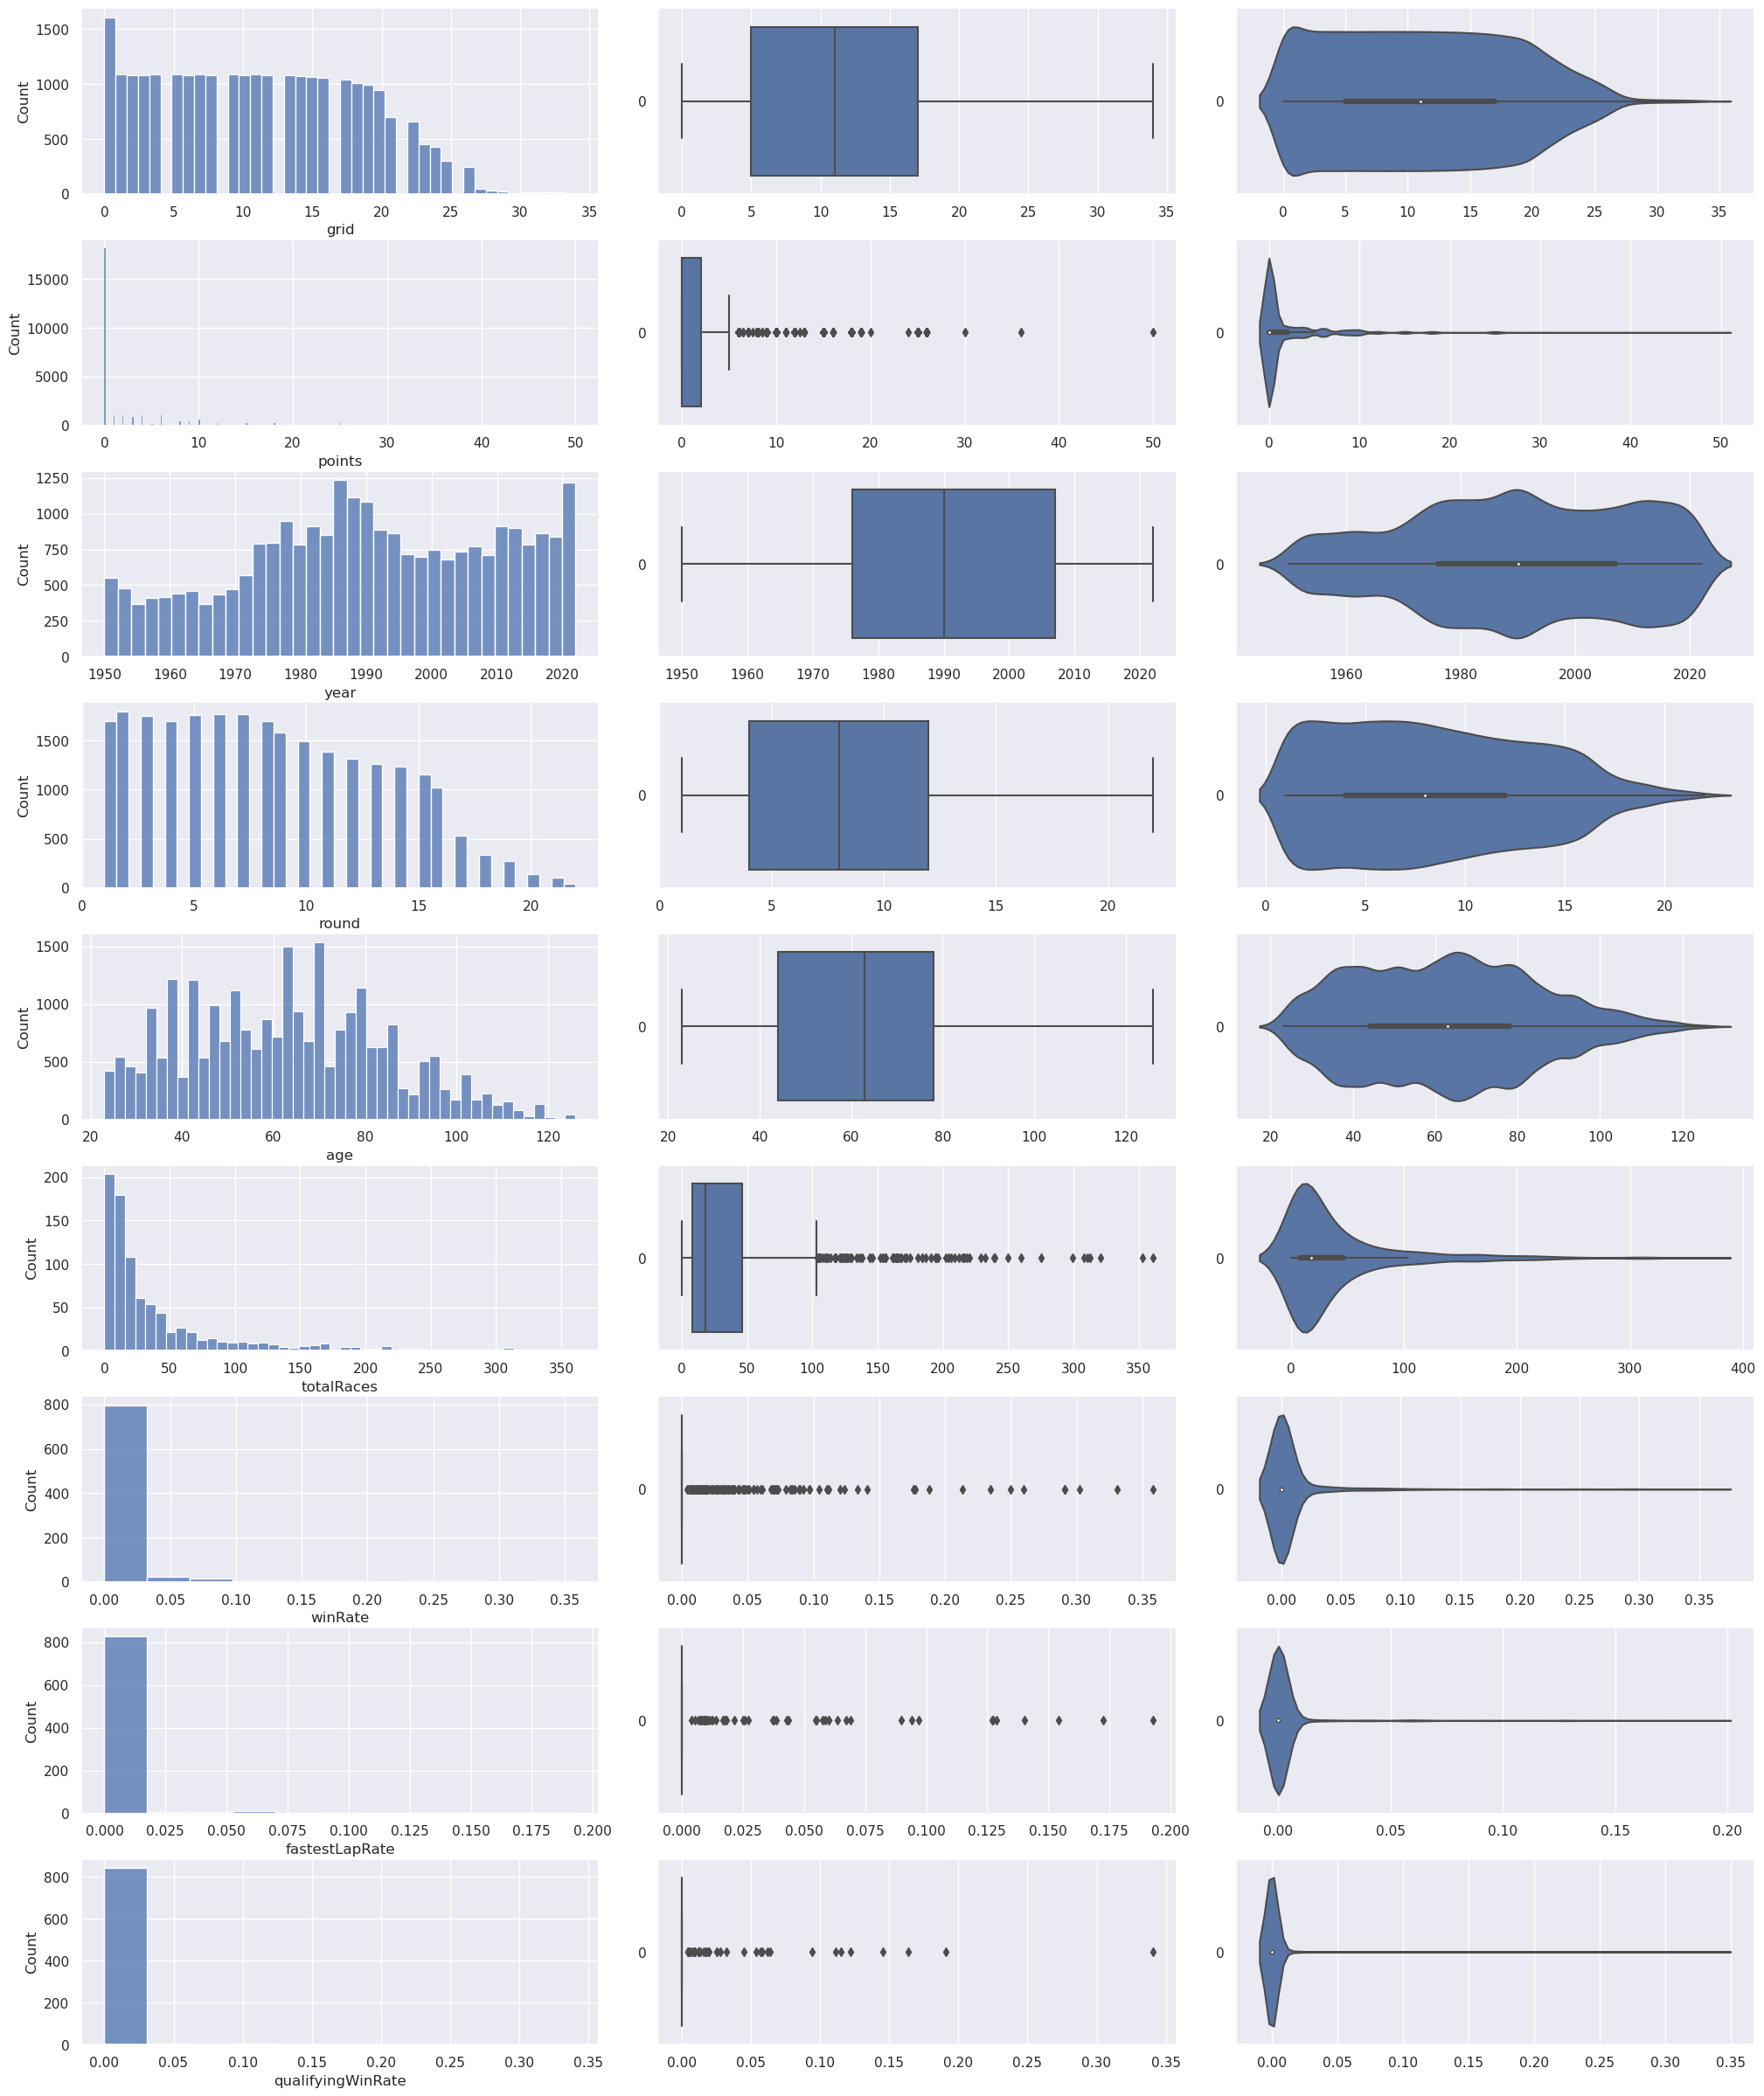

In [20]:
# plotting the distributions of the level variables
f, axes = plt.subplots(9, 3, figsize=(20, 24))

df_numeric = pd.DataFrame(df_race[['grid', 'points', 'year', 'round', 'age']])
# Format the layout so that no overlapping between titles and graphs
df_numeric_1 = pd.DataFrame(df_driver[['totalRaces', 'winRate', 'fastestLapRate', 'qualifyingWinRate']])
plt.tight_layout()
count = 0

for var in df_numeric:
    sns.histplot(data = df_numeric[var], ax = axes[count,0])
    sns.boxplot(data = df_numeric[var], orient = "h", ax = axes[count,1])
    sns.violinplot(data = df_numeric[var], orient = "h", ax = axes[count,2])
    count += 1
    
for var in df_numeric_1:
    sns.histplot(data = df_numeric_1[var], ax = axes[count,0])
    sns.boxplot(data = df_numeric_1[var], orient = "h", ax = axes[count,1])
    sns.violinplot(data = df_numeric_1[var], orient = "h", ax = axes[count,2])
    count += 1

# plotting the distributions of the level variables
f, axes = plt.subplots(9, 3, figsize=(20, 24))

df_numeric = pd.DataFrame(df_race[['grid', 'points', 'year', 'round', 'age']])
# Format the layout so that no overlapping between titles and graphs
df_numeric_1 = pd.DataFrame(df_driver[['totalRaces', 'winRate', 'fastestLapRate', 'qualifyingWinRate']])
plt.tight_layout()
count = 0

for var in df_numeric:
    sns.histplot(data = df_numeric[var], ax = axes[count,0])
    sns.boxplot(data = df_numeric[var], orient = "h", ax = axes[count,1])
    sns.violinplot(data = df_numeric[var], orient = "h", ax = axes[count,2])
    count += 1
    
for var in df_numeric_1:
    sns.histplot(data = df_numeric_1[var], ax = axes[count,0])
    sns.boxplot(data = df_numeric_1[var], orient = "h", ax = axes[count,1])
    sns.violinplot(data = df_numeric_1[var], orient = "h", ax = axes[count,2])
    count += 1

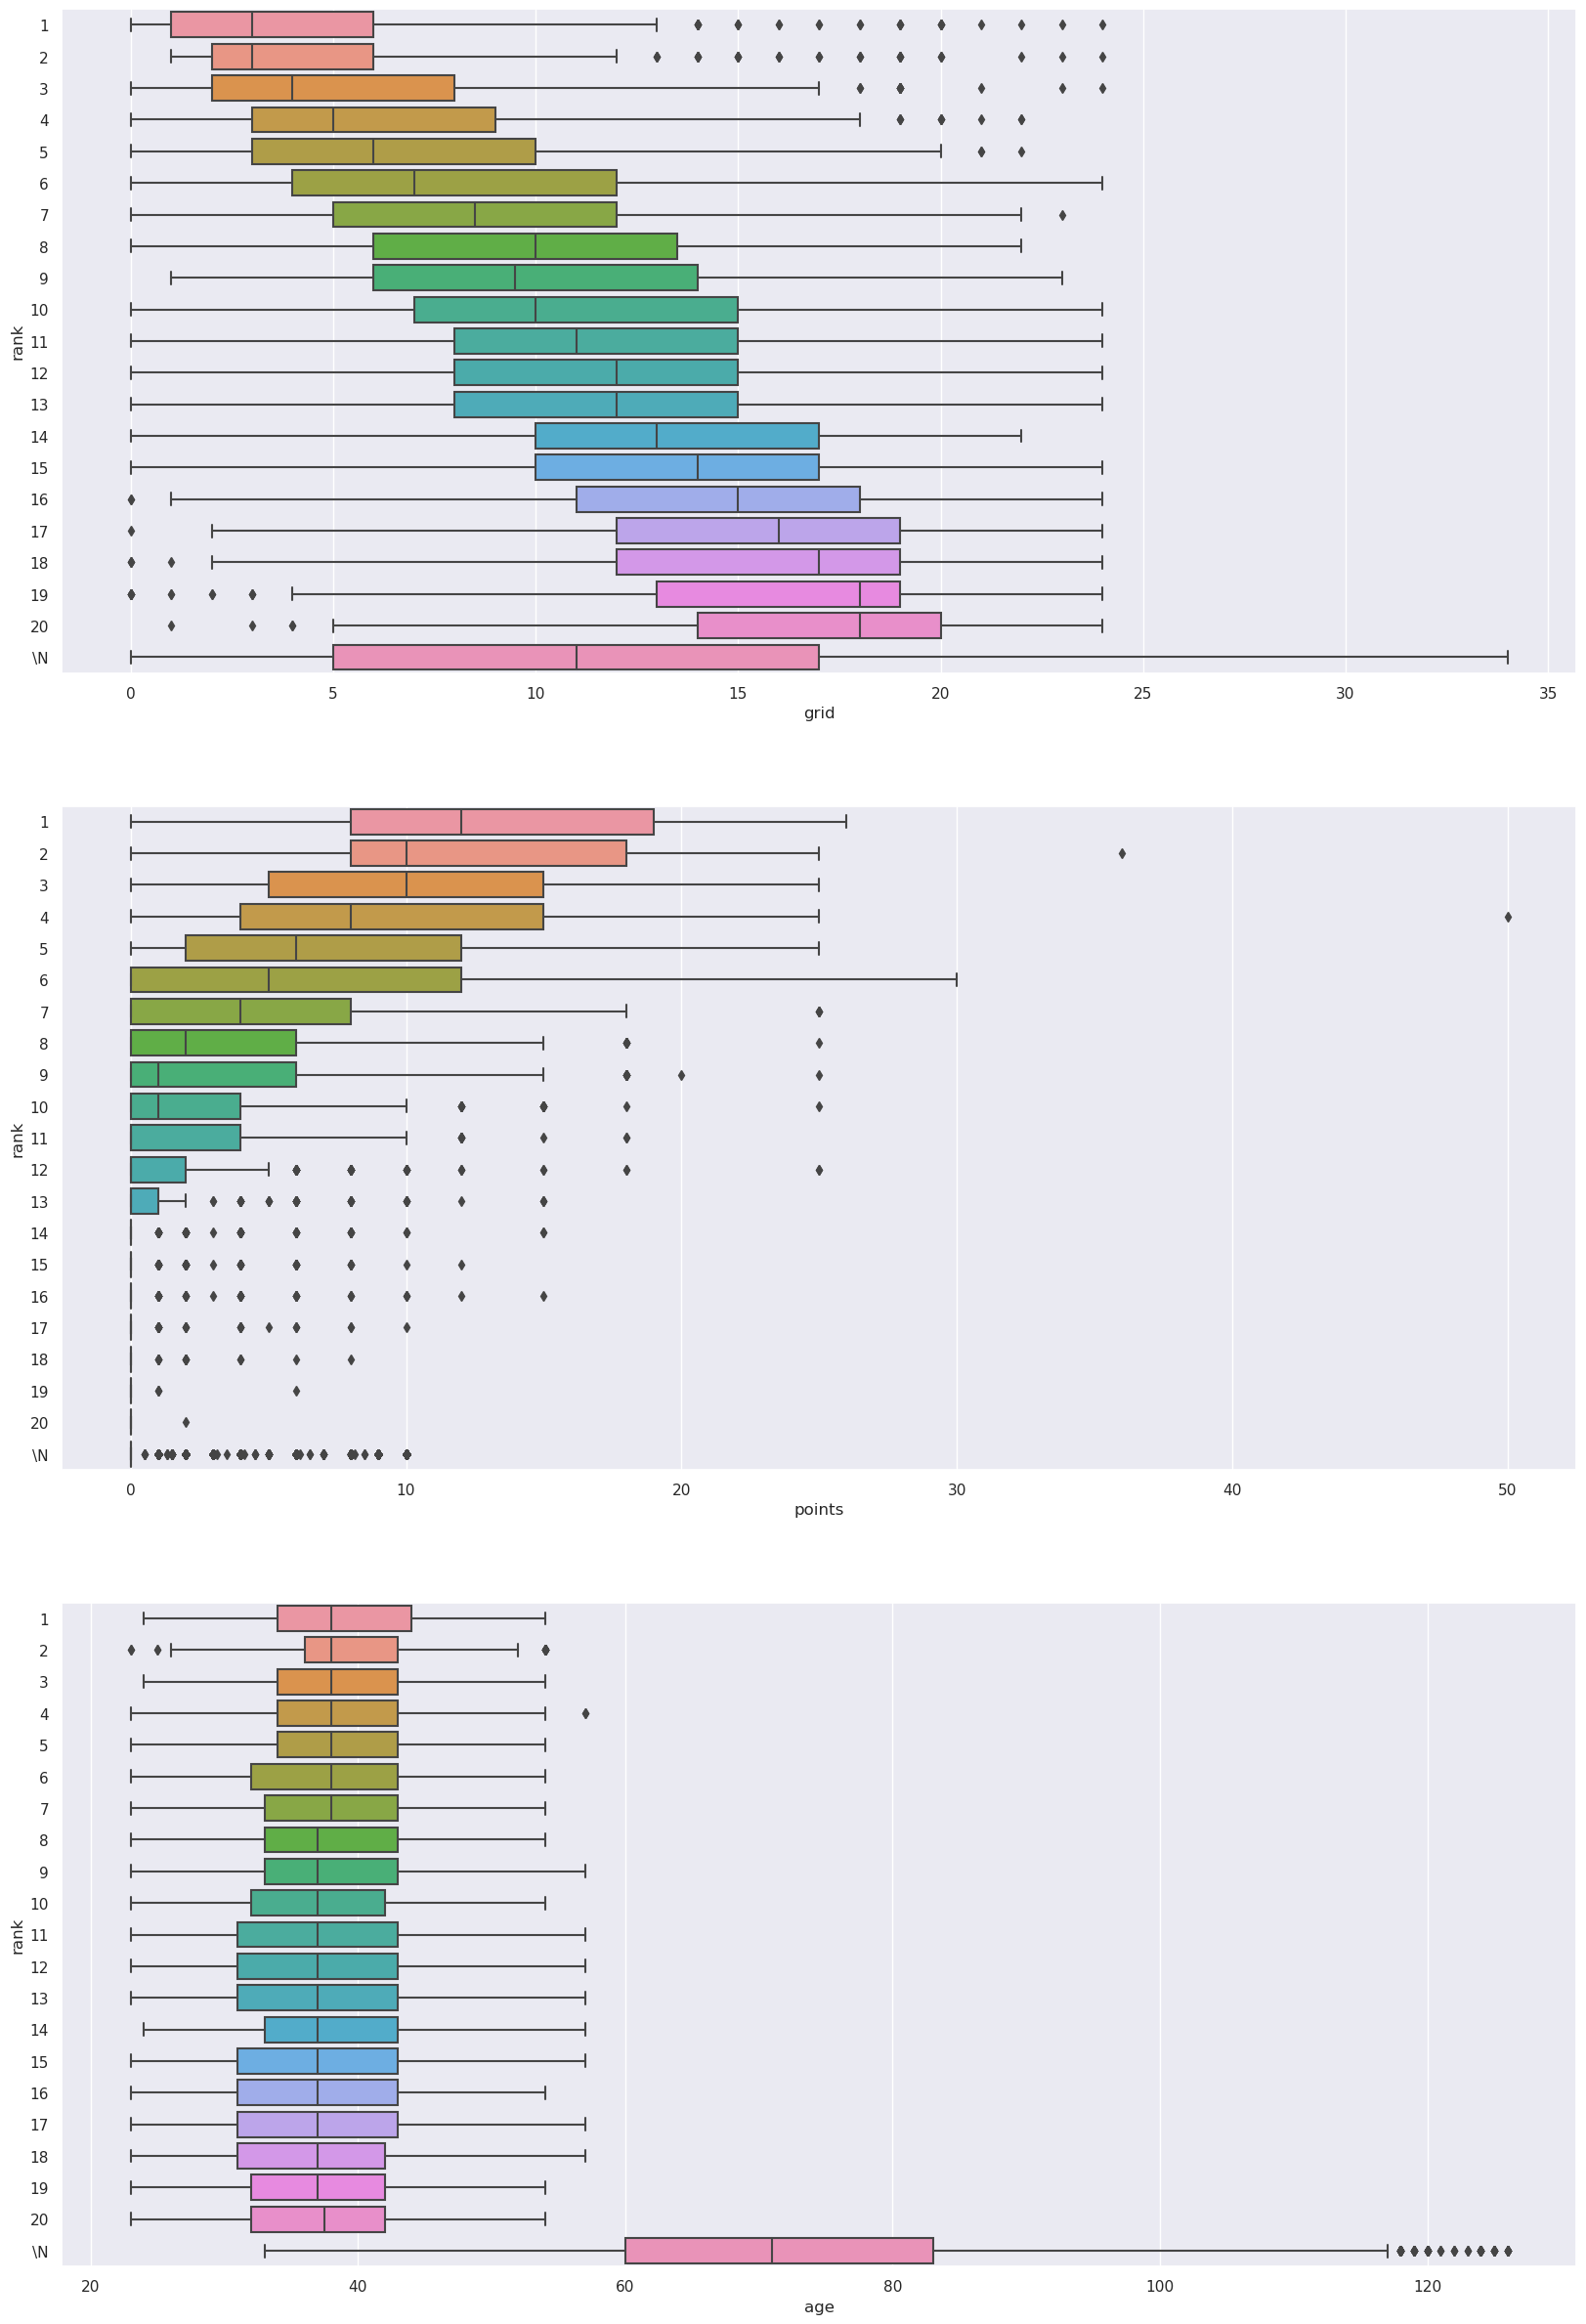

In [21]:
#Categorical Value
f, axes = plt.subplots(3, 1, figsize=(20, 30))
df_cat = pd.DataFrame(df_race[['grid', 'points', 'age', 'rank']])
count = 0
for col in df_cat:
    if col!='rank':
        sns.boxplot(data=df_race, x=col, y='rank', order=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17','18', '19', '20', '\\N'], ax=axes[count])
        count = count + 1

In [22]:
df_race.describe()

,resultId,raceId,driverId,constructorId,grid,points,year,round,circuitId,age
count,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000
mean,12921.334327,531.425813,261.732082,48.628328,11.179063,1.877053,1990.251780,8.385991,23.486920,62.646904
std,7460.682031,299.440908,268.623016,59.732131,7.243725,4.169849,19.345632,4.958210,18.569371,21.729232
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1950.000000,1.000000,1.000000,23.000000
25%,6460.750000,293.000000,56.000000,6.000000,5.000000,0.000000,1976.000000,4.000000,9.000000,44.000000
50%,12920.500000,514.000000,163.000000,25.000000,11.000000,0.000000,1990.000000,8.000000,18.000000,63.000000
75%,19380.250000,784.000000,360.000000,58.000000,17.000000,2.000000,2007.000000,12.000000,34.000000,78.000000
max,25845.000000,1096.000000,856.000000,214.000000,34.000000,50.000000,2022.000000,22.000000,79.000000,126.000000


<AxesSubplot:>

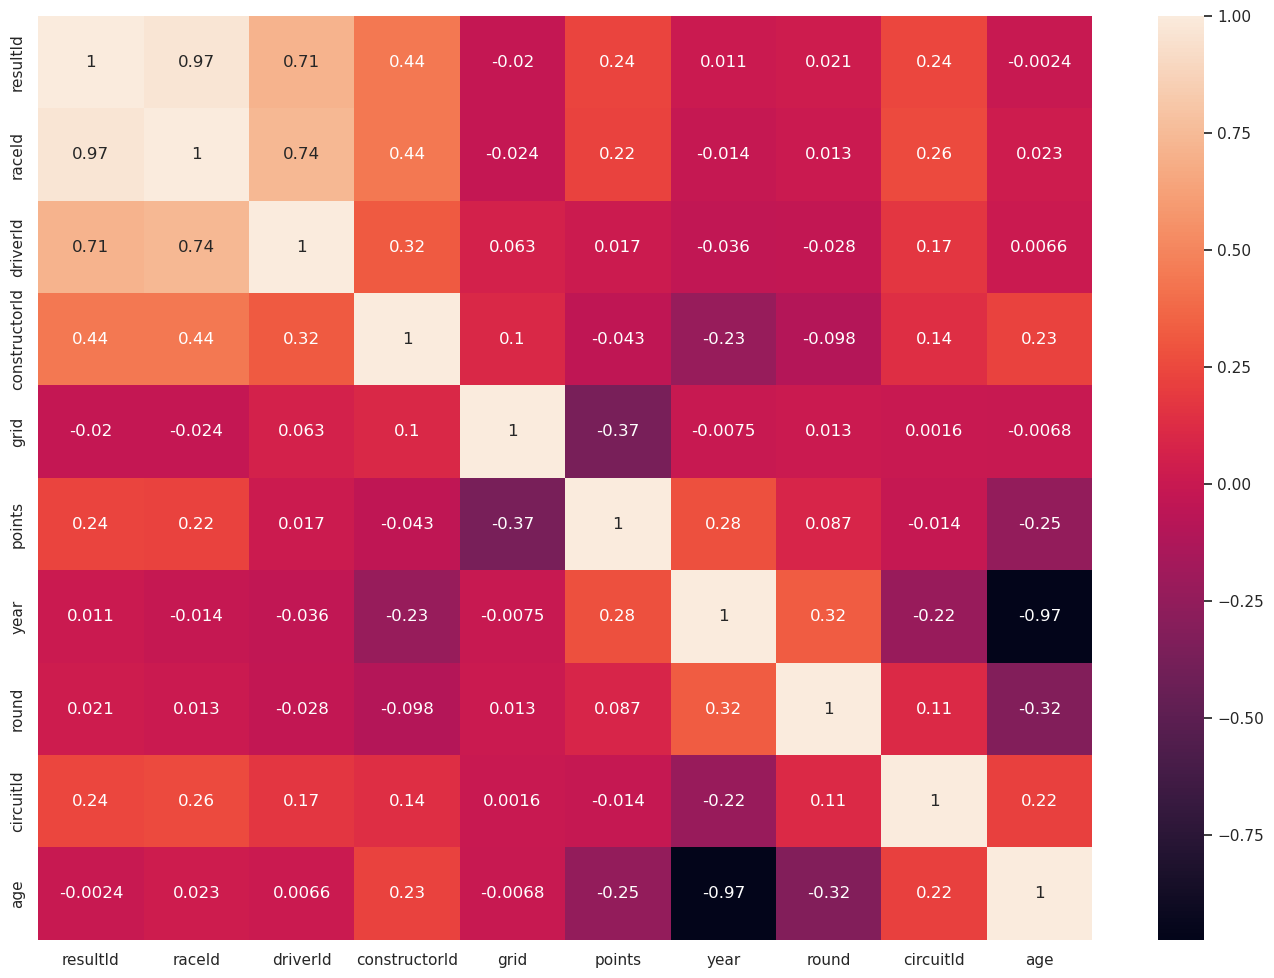

In [23]:
plt.figure(figsize=(17,12))
sns.heatmap(df_race.corr(),annot=True)

In [24]:
#Clasify race as the first half and second half by a new variable first_half
driver_result_withdate_divided = df_race.copy()
driver_result_withdate_divided['firstHalf'] = (driver_result_withdate_divided['date'].dt.month <= 6).astype(int)
driver_result_withdate_divided

,resultId,raceId,driverId,constructorId,grid,points,rank,year,round,circuitId,date,code,forename,surname,dob,age,firstHalf
0,1,18,1,1,1,10.0,2,2008,1,1,2008-03-16,HAM,Lewis,Hamilton,1985-01-07,38.0,1
1,27,19,1,1,9,4.0,3,2008,2,2,2008-03-23,HAM,Lewis,Hamilton,1985-01-07,38.0,1
2,57,20,1,1,3,0.0,19,2008,3,3,2008-04-06,HAM,Lewis,Hamilton,1985-01-07,38.0,1
3,69,21,1,1,5,6.0,3,2008,4,4,2008-04-27,HAM,Lewis,Hamilton,1985-01-07,38.0,1
4,90,22,1,1,3,8.0,2,2008,5,5,2008-05-11,HAM,Lewis,Hamilton,1985-01-07,38.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25777,1093,855,51,18,0.0,15,2022,19,69,2022-10-23,ZHO,Guanyu,Zhou,1999-05-30,24.0,0
25836,25798,1094,855,51,12,0.0,7,2022,20,32,2022-10-30,ZHO,Guanyu,Zhou,1999-05-30,24.0,0
25837,25817,1095,855,51,13,0.0,17,2022,21,18,2022-11-13,ZHO,Guanyu,Zhou,1999-05-30,24.0,0
25838,25837,1096,855,51,15,0.0,8,2022,22,24,2022-11-20,ZHO,Guanyu,Zhou,1999-05-30,24.0,0


In [25]:
driver_result_withdate_groupby_year_divided = driver_result_withdate_divided.groupby([driver_result_withdate_divided['date'].dt.year, driver_result_withdate_divided['firstHalf'], driver_result_withdate_divided['driverId']])

In [26]:
driver_result_withdate_groupby_year_divided.head()

,resultId,raceId,driverId,constructorId,grid,points,rank,year,round,circuitId,date,code,forename,surname,dob,age,firstHalf
0,1,18,1,1,1,10.0,2,2008,1,1,2008-03-16,HAM,Lewis,Hamilton,1985-01-07,38.0,1
1,27,19,1,1,9,4.0,3,2008,2,2,2008-03-23,HAM,Lewis,Hamilton,1985-01-07,38.0,1
2,57,20,1,1,3,0.0,19,2008,3,3,2008-04-06,HAM,Lewis,Hamilton,1985-01-07,38.0,1
3,69,21,1,1,5,6.0,3,2008,4,4,2008-04-27,HAM,Lewis,Hamilton,1985-01-07,38.0,1
4,90,22,1,1,3,8.0,2,2008,5,5,2008-05-11,HAM,Lewis,Hamilton,1985-01-07,38.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25827,25619,1084,855,51,13,0.0,9,2022,11,70,2022-07-10,ZHO,Guanyu,Zhou,1999-05-30,24.0,0
25828,25641,1085,855,51,16,0.0,18,2022,12,34,2022-07-24,ZHO,Guanyu,Zhou,1999-05-30,24.0,0
25829,25658,1086,855,51,12,0.0,5,2022,13,11,2022-07-31,ZHO,Guanyu,Zhou,1999-05-30,24.0,0
25830,25679,1087,855,51,18,0.0,9,2022,14,13,2022-08-28,ZHO,Guanyu,Zhou,1999-05-30,24.0,0


In [27]:
driver_result_withdate_groupby_year_divided = driver_result_withdate_divided.groupby([driver_result_withdate_divided['date'].dt.year, driver_result_withdate_divided['firstHalf'], driver_result_withdate_divided['driverId']])

point_year_divided = driver_result_withdate_groupby_year_divided["points"].sum().unstack()
display(point_year_divided)

driverId          1    2    3     4    5    6    7    8    9    10   ...  \
date firstHalf                                                       ...   
1950 0            NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
     1            NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
1951 0            NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
     1            NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
1952 0            NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
...               ...  ...  ...   ...  ...  ...  ...  ...  ...  ...  ...   
2020 0          347.0  NaN  NaN   NaN  NaN  NaN  NaN  4.0  NaN  NaN  ...   
2021 0          247.5  NaN  NaN  62.0  NaN  NaN  NaN  9.0  0.0  NaN  ...   
     1          138.0  NaN  NaN  19.0  NaN  NaN  NaN  1.0  NaN  NaN  ...   
2022 0          156.0  NaN  NaN  63.0  NaN  NaN  NaN  NaN  NaN  NaN  ...   
     1           77.0  NaN  NaN  18.0  NaN  NaN  NaN  NaN  NaN  NaN  ...   

driverId          847    848  849  850  851   852  853   854  855  856  
date firstHalf                                                          
1950 0            NaN    NaN  NaN  NaN  NaN   NaN  NaN   NaN  NaN  NaN  
     1            NaN    NaN  NaN  NaN  NaN   NaN  NaN   NaN  NaN  NaN  
1951 0            NaN    NaN  NaN  NaN  NaN   NaN  NaN   NaN  NaN  NaN  
     1            NaN    NaN  NaN  NaN  NaN   NaN  NaN   NaN  NaN  NaN  
1952 0            NaN    NaN  NaN  NaN  NaN   NaN  NaN   NaN  NaN  NaN  
...               ...    ...  ...  ...  ...   ...  ...   ...  ...  ...  
2020 0            3.0  105.0  0.0  0.0  0.0   NaN  NaN   NaN  NaN  NaN  
2021 0           16.0    NaN  7.0  NaN  NaN  23.0  0.0   0.0  NaN  NaN  
     1            0.0    NaN  0.0  NaN  NaN   9.0  0.0   0.0  NaN  NaN  
2022 0          151.0    1.0  2.0  NaN  NaN   1.0  NaN  12.0  1.0  2.0  
     1          111.0    3.0  0.0  NaN  NaN  11.0  NaN   0.0  5.0  NaN  

[145 rows x 855 columns]

In [28]:

age_year = driver_result_withdate_groupby_year_divided["age"].mean().unstack()
age_year


driverId         1    2    3     4    5    6    7     8     9    10   ...  \
date firstHalf                                                        ...   
1950 0           NaN  NaN  NaN   NaN  NaN  NaN  NaN   NaN   NaN  NaN  ...   
     1           NaN  NaN  NaN   NaN  NaN  NaN  NaN   NaN   NaN  NaN  ...   
1951 0           NaN  NaN  NaN   NaN  NaN  NaN  NaN   NaN   NaN  NaN  ...   
     1           NaN  NaN  NaN   NaN  NaN  NaN  NaN   NaN   NaN  NaN  ...   
1952 0           NaN  NaN  NaN   NaN  NaN  NaN  NaN   NaN   NaN  NaN  ...   
...              ...  ...  ...   ...  ...  ...  ...   ...   ...  ...  ...   
2020 0          38.0  NaN  NaN   NaN  NaN  NaN  NaN  44.0   NaN  NaN  ...   
2021 0          38.0  NaN  NaN  42.0  NaN  NaN  NaN  44.0  38.0  NaN  ...   
     1          38.0  NaN  NaN  42.0  NaN  NaN  NaN  44.0   NaN  NaN  ...   
2022 0          38.0  NaN  NaN  42.0  NaN  NaN  NaN   NaN   NaN  NaN  ...   
     1          38.0  NaN  NaN  42.0  NaN  NaN  NaN   NaN   NaN  NaN  ...   

driverId         847   848   849   850   851   852   853   854   855   856  
date firstHalf                                                              
1950 0           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
     1           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1951 0           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
     1           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1952 0           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
...              ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
2020 0          25.0  27.0  28.0  27.0  28.0   NaN   NaN   NaN   NaN   NaN  
2021 0          25.0   NaN  28.0   NaN   NaN  23.0  24.0  24.0   NaN   NaN  
     1          25.0   NaN  28.0   NaN   NaN  23.0  24.0  24.0   NaN   NaN  
2022 0          25.0  27.0  28.0   NaN   NaN  23.0   NaN  24.0  24.0  28.0  
     1          25.0  27.0  28.0   NaN   NaN  23.0   NaN  24.0  24.0   NaN  

[145 rows x 855 columns]

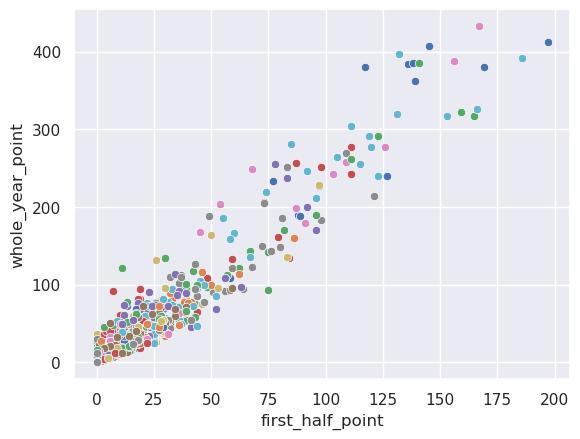

In [29]:


#Loop through each team 
#Column name is ID of each team
df_final = []
id_driver =[]
point_first_half_all = []
whole_year_point_all = []
for column in point_year_divided:
    point_year_driver_divided = point_year_divided[column].unstack()
    point_first_half = []
    whole_year_point = []
    ages = []
    age_one_year = age_year[column].unstack()
    point_year_driver_divided = pd.merge(point_year_driver_divided, age_one_year, on='date')
    #Loop through each year
    for row in point_year_driver_divided.iterrows():
        if not np.isnan(row[1][0]) and not np.isnan(row[1][1]) and (not np.isnan(row[1][2]) or not np.isnan(row[1][3])):
            if not np.isnan(row[1][2]):
                age = row[1][2]
            else:
                age = row[1][3]
            ages.append(age)
            id_driver.append(column)
            point_first_half.append(row[1][1])
            point_first_half_all.append(row[1][1])
            whole_year_point.append(row[1][0]+row[1][1])
            whole_year_point_all.append(row[1][0])
            
    new_df = pd.DataFrame({'first_half_point':point_first_half, 'ages': ages, 'whole_year_point':whole_year_point, 'id_driver':column})
    df_final.append(new_df)
    sns.scatterplot(x='first_half_point', y='whole_year_point', data=new_df)


In [30]:
df_final = pd.concat(df_final, ignore_index=True)

In [31]:
df_final

,first_half_point,ages,whole_year_point,id_driver
0,58.0,38.0,109.0,1
1,38.0,38.0,98.0,1
2,9.0,38.0,49.0,1
3,127.0,38.0,240.0,1
4,97.0,38.0,227.0,1
...,...,...,...,...
1786,11.0,23.0,12.0,852
1787,0.0,24.0,0.0,853
1788,0.0,24.0,0.0,854
1789,0.0,24.0,12.0,854


In [32]:
df_join = df_final.merge(df_driver, left_on='id_driver', right_on='driverId')


In [33]:
df_join

,first_half_point,ages,whole_year_point,id_driver,driverId,driverRef,number,code,forename,surname,dob,nationality,url,totalRaces,winRate,age,fastestLapRate,qualifyingWinRate
0,58.0,38.0,109.0,1,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,311.0,0.33119,38,0.192926,0.340836
1,38.0,38.0,98.0,1,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,311.0,0.33119,38,0.192926,0.340836
2,9.0,38.0,49.0,1,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,311.0,0.33119,38,0.192926,0.340836
3,127.0,38.0,240.0,1,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,311.0,0.33119,38,0.192926,0.340836
4,97.0,38.0,227.0,1,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,311.0,0.33119,38,0.192926,0.340836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786,11.0,23.0,12.0,852,852,tsunoda,22,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda,45.0,0.00000,23,0.000000,0.000000
1787,0.0,24.0,0.0,853,853,mazepin,9,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin,22.0,0.00000,24,0.000000,0.000000
1788,0.0,24.0,0.0,854,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher,44.0,0.00000,24,0.000000,0.000000
1789,0.0,24.0,12.0,854,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher,44.0,0.00000,24,0.000000,0.000000


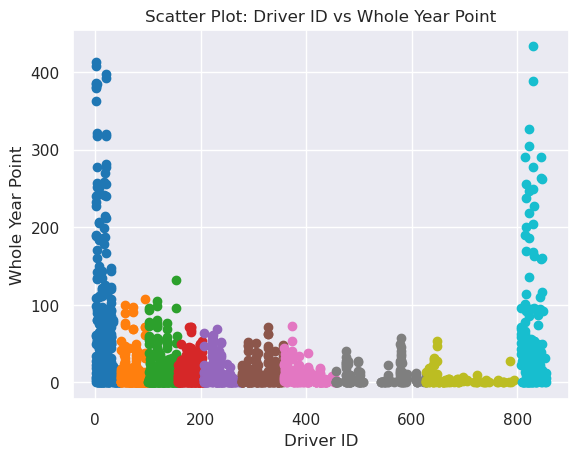

In [34]:
import matplotlib.pyplot as plt

# Create a list of unique driver IDs
unique_driver_ids = df_join['driverId'].unique()

# Create a colormap with a unique color for each driver
colormap = plt.cm.get_cmap('tab10', len(unique_driver_ids))

# Create scatter plot
for i, driver_id in enumerate(unique_driver_ids):
    driver_data = df_join[df_join['driverId'] == driver_id]
    plt.scatter(driver_data['driverId'], driver_data['whole_year_point'], color=colormap(i), label=driver_id)

plt.xlabel('Driver ID')
plt.ylabel('Whole Year Point')
plt.title('Scatter Plot: Driver ID vs Whole Year Point')


# Display the plot
plt.show()


plott 
ox- id
oy tot anu

# 4. Supervised Method

In this step, we will use several predictive models to discover possible patterns in the dataset and make predictions based on them. From there, we would be a step closer in answering our first objective:
    <ul>
    <li>Which driver will finish in the top position in the Driver’s Championship at the end of the season based on their past performance and characteristics using supervised learning methods</li>
    </ul>
    
After doing EDA, we decide to use points as target variables to predict. From that, we can use points to decide which driver will finish in the top position. We seperate it into two tracks:
<ul> 
    <li>In first situation, we assume that we already known the first half of year performance of drivers. From that we predict overall season performance of drivers </li>
    <li>In second situation, we do not know about this season performance of drivers. From last year performance of drivers, we predict races performance of this year</li>  
</ul>
Note: Due to the raw and incomplete nature of the data, leading to significant instability, we have decided to predict the average of ten races for the upcoming year in the second scenario.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor

## 4.1 First Track

### 4.1.1 Linear Regression

From the result, the linear regression model we developed provides a good fit for our data. The model was able to explain a significant proportion of the variance in the dependent variable using the independent variable. The coefficients for the independent variable were statistically significant, indicating a strong relationship between the two variables.

> We want to further improve the correctness of prediction by trying polynomial regression

Cross Validation

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Create the regression model
model = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(model, pd.DataFrame(point_first_half_all), pd.DataFrame(whole_year_point_all), cv=5, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Print the MSE scores for each fold
print("Cross-Validation Mean Squared Error (MSE):")
for i, score in enumerate(cv_scores):
    print("Fold {}: {}".format(i+1, score))

# Calculate the mean MSE across all folds
mean_mse = np.mean(cv_scores)
print("Mean MSE: {}".format(mean_mse))

# Perform cross-validation for R-squared
cv_scores_r2 = cross_val_score(model, pd.DataFrame(point_first_half_all), pd.DataFrame(whole_year_point_all), cv=5, scoring='r2')

# Print the R-squared scores for each fold
print("Cross-Validation R-squared (Coefficient of Determination):")
for i, score in enumerate(cv_scores_r2):
    print("Fold {}: {}".format(i+1, score))

# Calculate the mean R-squared across all folds
mean_r2 = np.mean(cv_scores_r2)
print("Mean R-squared: {}".format(mean_r2))


Cross-Validation Mean Squared Error (MSE):
Fold 1: 506.86887841280765
Fold 2: 70.21609778990641
Fold 3: 116.91400895642514
Fold 4: 47.427109305293364
Fold 5: 291.59544733815244
Mean MSE: 206.604308360517
Cross-Validation R-squared (Coefficient of Determination):
Fold 1: 0.8200254120064184
Fold 2: 0.6517192708196973
Fold 3: 0.10573082532988176
Fold 4: 0.3677718805542406
Fold 5: 0.8159491626031349
Mean R-squared: 0.5522393102626746


# **#My try for liniar regression**

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Preparing the data
X = np.array(point_first_half_all).reshape(-1, 1)
y = np.array(whole_year_point_all).reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

ridge = Ridge()
ridge.fit(X_train_scaled, y_train)

# Hyperparameter Tuning with GridSearchCV
params = {'alpha': np.logspace(-4, 4, 9)}

lasso_cv = GridSearchCV(lasso, params, cv=5)
lasso_cv.fit(X_train_scaled, y_train)

ridge_cv = GridSearchCV(ridge, params, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

# Evaluate models
models = [lr, lasso_cv.best_estimator_, ridge_cv.best_estimator_]
model_names = ['Linear Regression (Test)', 'Lasso (Test)', 'Ridge (Test)']

for name, model in zip(model_names, models):
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name} RMSE: {rmse:.2f}, R2: {r2:.2f}")

# Cross-Validation
model_names_cv = ['Linear Regression (CV)', 'Lasso (CV)', 'Ridge (CV)']
for name, model in zip(model_names_cv, models):
    cv_rmse = np.sqrt(abs(np.mean(cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error'))))
    cv_r2 = np.mean(cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2'))
    print(f"{name} CV RMSE: {cv_rmse:.2f}, CV R2: {cv_r2:.2f}")



Linear Regression (Test) RMSE: 13.45, R2: 0.78
Lasso (Test) RMSE: 13.42, R2: 0.79
Ridge (Test) RMSE: 13.39, R2: 0.79
Linear Regression (CV) CV RMSE: 14.63, CV R2: 0.81
Lasso (CV) CV RMSE: 14.63, CV R2: 0.81
Ridge (CV) CV RMSE: 14.63, CV R2: 0.81


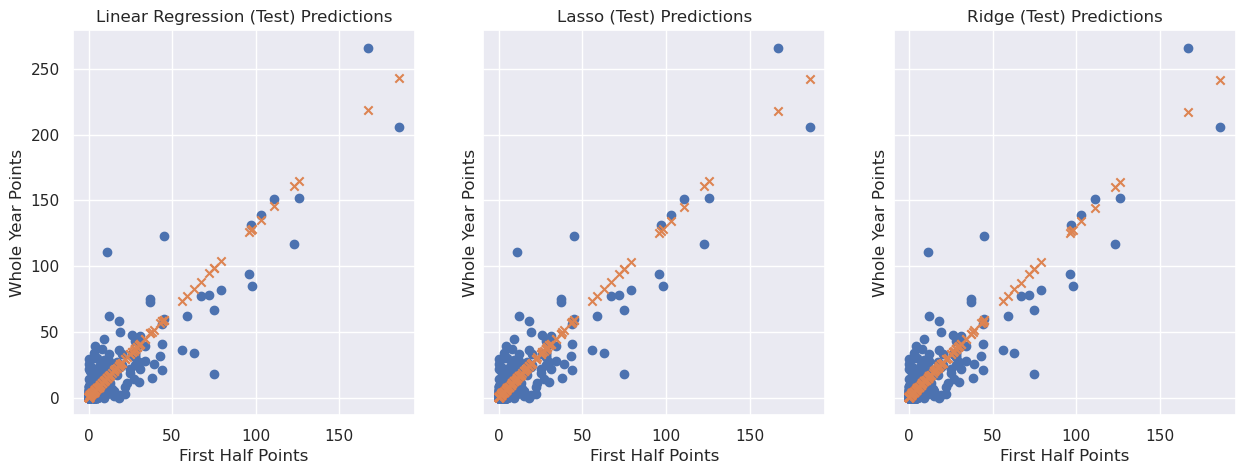

In [38]:
# Create a scatter plot to visualize the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for ax, name, model in zip(axes, model_names, models):
    y_pred = model.predict(X_test_scaled)
    ax.scatter(X_test, y_test, label='Actual')
    ax.scatter(X_test, y_pred, label='Predicted', marker='x')
    ax.set_title(f'{name} Predictions')
    ax.set_xlabel('First Half Points')
    ax.set_ylabel('Whole Year Points')
   


# Polynomial features

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Create a function to train and evaluate a model with polynomial features
def train_and_evaluate_model_with_poly_features(model, degree, X_train, X_test, y_train, y_test):
    pipeline = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree)),
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return rmse, r2

# Test polynomial features with different degrees
degree_range = range(1, 6)
model_names = ['Lasso', 'Ridge']
models = [lasso_cv.best_estimator_, ridge_cv.best_estimator_]

for name, model in zip(model_names, models):
    print(f"{name} with Polynomial Features:")
    for degree in degree_range:
        rmse, r2 = train_and_evaluate_model_with_poly_features(model, degree, X_train, X_test, y_train, y_test)
        print(f"Degree {degree} RMSE: {rmse:.2f}, R2: {r2:.2f}")
    print()


Lasso with Polynomial Features:
Degree 1 RMSE: 13.42, R2: 0.79
Degree 2 RMSE: 13.28, R2: 0.79
Degree 3 RMSE: 13.51, R2: 0.78
Degree 4 RMSE: 13.59, R2: 0.78
Degree 5 RMSE: 13.53, R2: 0.78

Ridge with Polynomial Features:
Degree 1 RMSE: 13.39, R2: 0.79
Degree 2 RMSE: 13.23, R2: 0.79
Degree 3 RMSE: 13.47, R2: 0.78
Degree 4 RMSE: 13.58, R2: 0.78
Degree 5 RMSE: 13.54, R2: 0.78



# Decision tree

Linear Regression RMSE: 0.40, R2: 0.78
Lasso RMSE: 0.86, R2: -0.00
Ridge RMSE: 0.40, R2: 0.78
Decision Tree RMSE: 0.51, R2: 0.65


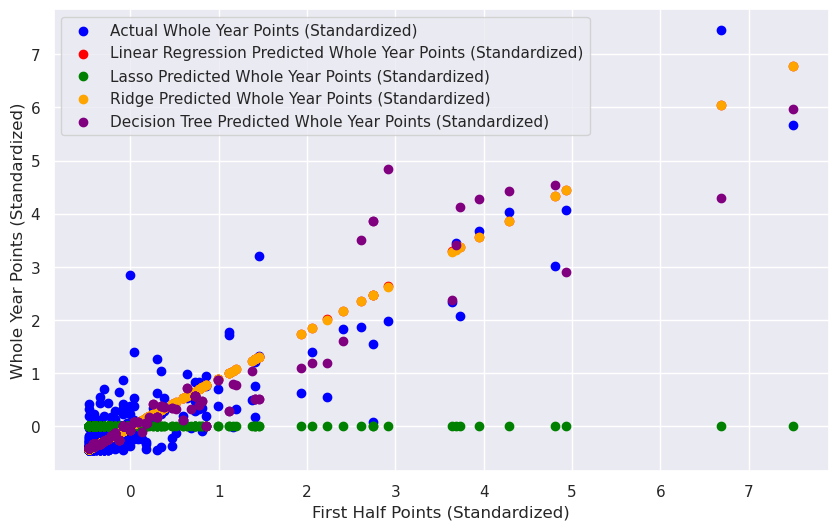

In [40]:
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Preparing the data
X = np.array(point_first_half_all).reshape(-1, 1)
y = np.array(whole_year_point_all).reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train_scaled)

# Lasso Regression
lasso = Lasso()
lasso.fit(X_train_scaled, y_train_scaled)

# Ridge Regression
ridge = Ridge()
ridge.fit(X_train_scaled, y_train_scaled)

# Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(X_train_scaled, y_train_scaled)

# Model evaluation
models = [lr, lasso, ridge, dt]
model_names = ['Linear Regression', 'Lasso', 'Ridge', 'Decision Tree']

for name, model in zip(model_names, models):
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred))
    r2 = r2_score(y_test_scaled, y_pred)
    print(f"{name} RMSE: {rmse:.2f}, R2: {r2:.2f}")

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled, y_test_scaled, color='blue', label='Actual Whole Year Points (Standardized)')

for name, model, color in zip(model_names, models, ['red', 'green', 'orange', 'purple']):
    y_pred = model.predict(X_test_scaled)
    plt.scatter(X_test_scaled, y_pred, color=color, label=f'{name} Predicted Whole Year Points (Standardized)')

plt.xlabel('First Half Points (Standardized)')
plt.ylabel('Whole Year Points (Standardized)')
plt.legend()
plt.show()


# Comparation liniar regression-kmeans

In [41]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare the data
X = np.array(point_first_half_all).reshape(-1, 1)
y = np.array(whole_year_point_all)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the K-means clustering algorithm
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(X_train)

# Assign cluster labels to the data points
cluster_labels = kmeans.predict(X_train)

# Train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# For each cluster, calculate the average value of the target variable
cluster_averages = {}
for cluster in range(k_optimal):
    cluster_points = y_train[cluster_labels == cluster]
    cluster_average = np.mean(cluster_points)
    cluster_averages[cluster] = cluster_average

# Predict the target variable using the linear regression model
y_pred = lr.predict(X_train)

# Compare the predicted values to the average values of the target variable for the clusters
differences = []
for i, pred in enumerate(y_pred):
    cluster = cluster_labels[i]
    cluster_average = cluster_averages[cluster]
    differences.append(pred - cluster_average)

# Calculate the Mean Squared Error (MSE) and Mean Absolute Error (MAE) between the predicted and average values
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)

print("MSE between linear regression predictions and cluster averages:", mse)
print("MAE between linear regression predictions and cluster averages:", mae)


MSE between linear regression predictions and cluster averages: 210.18141989846953
MAE between linear regression predictions and cluster averages: 7.7051921949346465


# Unsupervised

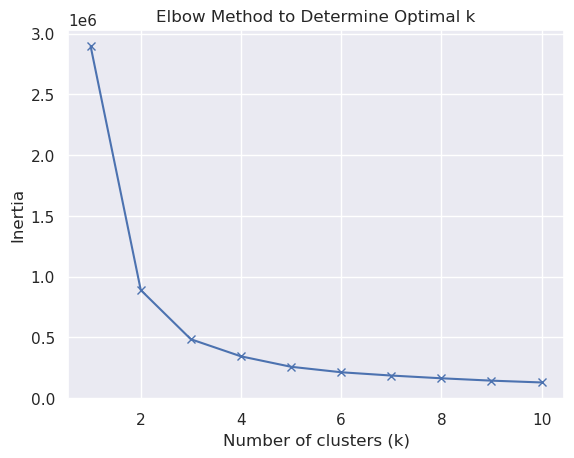

Silhouette Score: 0.7115925047208114
Davies-Bouldin Index: 0.594264563968566


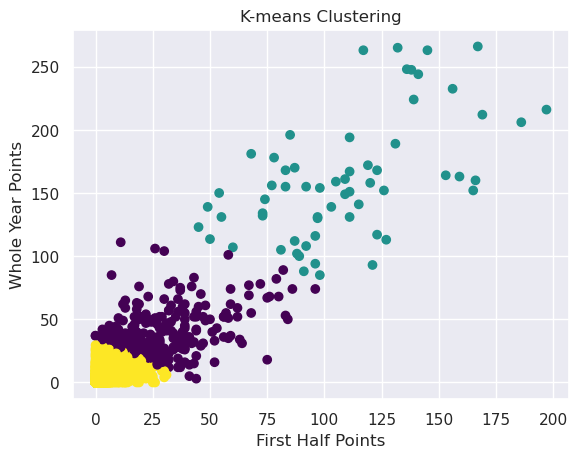

In [42]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score
# Ensure the data points are in the correct format (flat lists or arrays)
point_first_half_all = np.array(point_first_half_all).flatten()
whole_year_point_all = np.array(whole_year_point_all).flatten()

# Prepare the data
data_points = pd.DataFrame({'first_half_point': point_first_half_all, 'whole_year_point': whole_year_point_all})

# Determine the optimal number of clusters using the elbow method
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_points)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_values, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

# From the plot, choose an appropriate k value (e.g., k = 3)
k_optimal = 3

# Train the K-means model with the optimal number of clusters
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(data_points)

# Predict the cluster labels for the data points
cluster_labels = kmeans.predict(data_points)


# Train the K-means model with the optimal number of clusters
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(data_points)

# Predict the cluster labels for the data points
cluster_labels = kmeans.predict(data_points)

# Calculate evaluation metrics
silhouette_avg = silhouette_score(data_points, cluster_labels)
davies_bouldin_index = davies_bouldin_score(data_points, cluster_labels)

print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", davies_bouldin_index)

# Visualize the clusters
plt.scatter(data_points['first_half_point'], data_points['whole_year_point'], c=cluster_labels, cmap='viridis')
plt.xlabel('First Half Points')
plt.ylabel('Whole Year Points')
plt.title('K-means Clustering')
plt.show()

